TESTE TÉCNICO | ENG DADOS QUALIDADE
# ANÁLISE EXPLORATÓRIA DE DADOS DE VENDA

Utilizando como fonte de dados os arquivos "vendas_tran.csv" e "vendedor.csv", a presente análise assume como objetivo investigar os principais indicadores comerciais da empresa em questão e realizar uma segmentação de clientes utilizando análise RFM/RFV.

O candidato tomou a decisão de realizar a modelagem utilizando Python, mas, visando agilidade, padronização e responsividade, optou por fazer as visualizações finais no próprio PowerPoint, utilizando a extensão Mekko Graphics.

# 1.0 Importando pacotes

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import squarify

from datetime import timedelta

sns.set()

# 2.0 Funções de suporte

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 3.0 Importando datasets

In [3]:
df = pd.read_csv('Datasets/vendas_tran.csv',sep=';',decimal=',')

vendedor = pd.read_csv('Datasets/vendedor.csv',sep=';')

In [4]:
df = pd.merge(df, vendedor, left_on='SalesPersonId', right_on='Salespersonid', how='left')

In [5]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,SalesPersonId,Salespersonid,SalesPersonName,SalesPersonLastName,Region
0,9261,CA-2017-167976,11/11/2017,11/14/2017,Second Class,JL-15505,Jeremy/Lonsdale,Consumer,United States,Aberdeen,South Dakota,57401 Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.50,3,0.0,6.63,3029,3029,Anna,Andreadi,West
1,6990,CA-2017-165099,12/11/2017,12/13/2017,First Class,DK-13375,Dennis/Kane,Consumer,United States,Abilene,Texas,79605 Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.39,2,0.8,-3.76,3032,3032,Cassandra,Brandow,South
2,201,CA-2017-105074,6/24/2017,6/29/2017,Standard Class,MB-17305,Maria/Bertelson,Consumer,United States,Akron,Ohio,44312 East,OFF-PA-10002666,Office Supplies,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,21.74,3,0.2,6.80,3029,3029,Anna,Andreadi,West
3,3201,CA-2014-164224,5/18/2014,5/20/2014,Second Class,TT-21070,Ted/Trevino,Consumer,United States,Akron,Ohio,44312 East,FUR-FU-10000308,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,149.23,3,0.2,3.73,3031,3031,Kelly,Williams,Central
4,3202,CA-2014-164224,5/18/2014,5/20/2014,Second Class,TT-21070,Ted/Trevino,Consumer,United States,Akron,Ohio,44312 East,OFF-PA-10001526,Office Supplies,Paper,Xerox 1949,15.94,4,0.2,5.78,3031,3031,Kelly,Williams,Central


# 4.0 Data Wrangling

In [6]:
# tamanho do dataset

df.shape

(9994, 25)

## 4.1 Data Types

In [7]:
# verificando os tipos de dados
df.dtypes

RowID                    int64
OrderID                 object
OrderDate               object
ShipDate                object
ShipMode                object
CustomerID              object
CustomerName            object
Segment                 object
Country                 object
City                    object
State                   object
PostalCode              object
ProductID               object
Category                object
SubCategory             object
ProductName             object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
SalesPersonId            int64
Salespersonid            int64
SalesPersonName         object
SalesPersonLastName     object
Region                  object
dtype: object

In [8]:
# modificando os tipos de dados

df['RowID'] = df['RowID'].astype(str)
df['OrderDate'] = pd.to_datetime(df['OrderDate'],format = '%m/%d/%Y')
df['ShipDate'] = pd.to_datetime(df['ShipDate'],format = '%m/%d/%Y')
df['SalesPersonId'] = df['SalesPersonId'].astype(str) 

In [9]:
df.dtypes

RowID                          object
OrderID                        object
OrderDate              datetime64[ns]
ShipDate               datetime64[ns]
ShipMode                       object
CustomerID                     object
CustomerName                   object
Segment                        object
Country                        object
City                           object
State                          object
PostalCode                     object
ProductID                      object
Category                       object
SubCategory                    object
ProductName                    object
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
SalesPersonId                  object
Salespersonid                   int64
SalesPersonName                object
SalesPersonLastName            object
Region                         object
dtype: object

## 4.2 Missing Values

In [10]:
# verificando valores nulos

df.isna().sum()

RowID                  0
OrderID                0
OrderDate              0
ShipDate               0
ShipMode               0
CustomerID             0
CustomerName           0
Segment                0
Country                0
City                   0
State                  0
PostalCode             0
ProductID              0
Category               0
SubCategory            0
ProductName            0
Sales                  0
Quantity               0
Discount               0
Profit                 0
SalesPersonId          0
Salespersonid          0
SalesPersonName        0
SalesPersonLastName    0
Region                 0
dtype: int64

## 4.3 Outliers

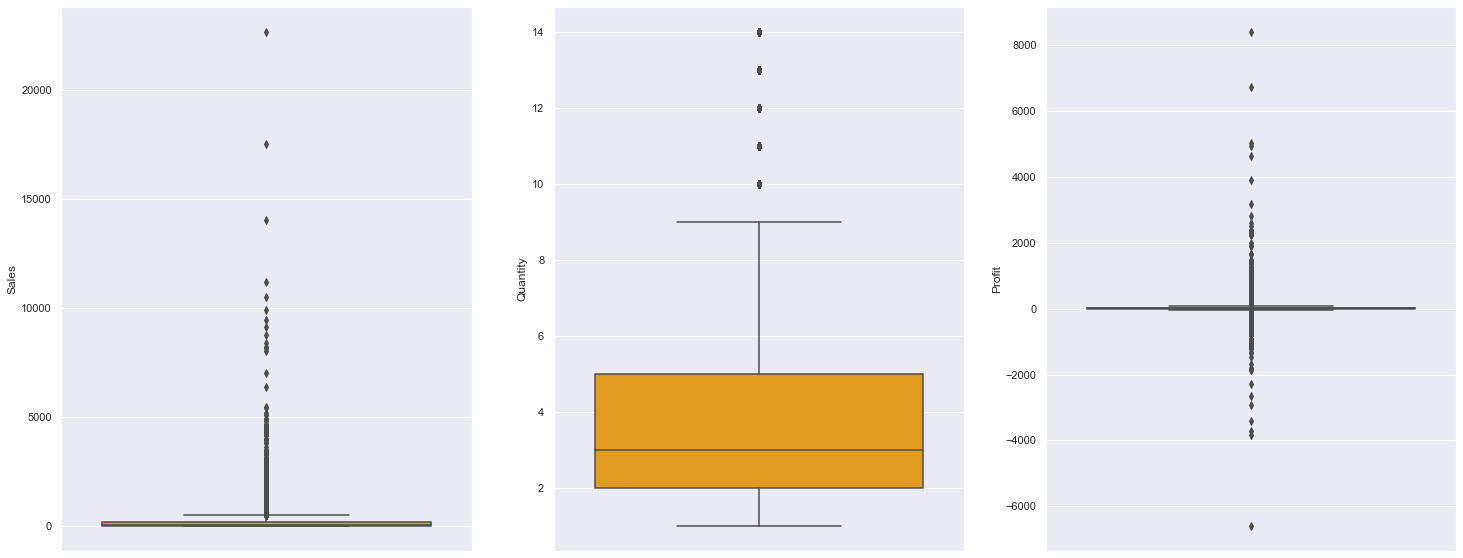

In [11]:
colunas = ['Sales','Quantity','Profit']

plt.figure(figsize=(25,10))

for k in range(len(colunas)):
    
    plt.subplot(1,3, k+1)
    sns.boxplot(y=colunas[k],
               data=df, color='orange')
    
plt.show()

In [12]:
# verificando as compras acima de 10000

df[df['Sales']>10000]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,SalesPersonId,Salespersonid,SalesPersonName,SalesPersonLastName,Region
3462,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean/Miller,Home Office,United States,Jacksonville,Florida,32216 South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.08,3031,3031,Kelly,Williams,Central
3601,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara/Chand,Corporate,United States,Lafayette,Indiana,47905 Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.98,3032,3032,Cassandra,Brandow,South
6146,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom/Ashbrook,Home Office,United States,New York City,New York,10024 East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.97,4,0.2,3919.99,3031,3031,Kelly,Williams,Central
6267,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter/Lopez,Consumer,United States,Newark,Delaware,19711 East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.99,3031,3031,Kelly,Williams,Central
8972,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond/Buch,Consumer,United States,Seattle,Washington,98115 West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.98,3032,3032,Cassandra,Brandow,South


Nesse caso, trata-se da compra de produtos de tecnologia, portando os valores não estão discrepante.

In [13]:
# verificando os outliers da variáveis 'quantity'

df[df['Quantity']>9]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,SalesPersonId,Salespersonid,SalesPersonName,SalesPersonLastName,Region
45,5647,CA-2015-104241,2015-01-04,2015-01-09,Standard Class,AG-10495,Andrew/Gjertsen,Corporate,United States,Alexandria,Virginia,22304 South,FUR-FU-10001473,Furniture,Furnishings,DAX Wood Document Frame,192.22,14,0.00,69.20,3031,3031,Kelly,Williams,Central
50,2583,US-2014-155502,2014-01-26,2014-01-31,Standard Class,SD-20485,Shirley/Daniels,Home Office,United States,Alexandria,Virginia,22304 South,TEC-PH-10004833,Technology,Phones,Macally Suction Cup Mount,155.35,13,0.00,0.00,3030,3030,Chuck,Magee,East
133,661,CA-2015-146563,2015-08-24,2015-08-28,Standard Class,CB-12025,Cassandra/Brandow,Consumer,United States,Arlington,Texas,76017 Central,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,724.08,14,0.20,-135.77,3030,3030,Chuck,Magee,East
149,7844,CA-2014-158470,2014-04-19,2014-04-23,Second Class,AG-10390,Allen/Goldenen,Consumer,United States,Arlington,Virginia,22204 South,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,71.28,11,0.00,34.21,3032,3032,Cassandra,Brandow,South
151,7847,CA-2015-125976,2015-09-27,2015-10-02,Standard Class,JK-15205,Jamie/Kunitz,Consumer,United States,Arlington,Virginia,22204 South,TEC-PH-10002496,Technology,Phones,Cisco SPA301,1871.88,12,0.00,561.56,3032,3032,Cassandra,Brandow,South
180,8414,CA-2016-147109,2016-12-17,2016-12-21,Standard Class,AH-10075,Adam/Hart,Corporate,United States,Arlington,Texas,76017 Central,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,51.84,10,0.20,18.14,3032,3032,Cassandra,Brandow,South
239,7342,CA-2014-116190,2014-07-26,2014-08-01,Standard Class,SG-20470,Sheri/Gordon,Consumer,United States,Atlanta,Georgia,30318 South,OFF-LA-10002762,Office Supplies,Labels,Avery 485,162.89,13,0.00,76.56,3032,3032,Cassandra,Brandow,South
439,8432,CA-2017-155621,2017-11-08,2017-11-13,Standard Class,KN-16450,Kean/Nguyen,Corporate,United States,Baltimore,Maryland,21215 East,FUR-FU-10003535,Furniture,Furnishings,Howard Miller Distant Time Traveler Alarm Clock,274.20,10,0.00,112.42,3032,3032,Cassandra,Brandow,South
450,9158,CA-2014-134215,2014-08-04,2014-08-08,Standard Class,ML-17395,Marina/Lichtenstein,Corporate,United States,Bangor,Maine,4401 East,OFF-PA-10004353,Office Supplies,Paper,Southworth 25% Cotton Premium Laser Paper and ...,259.74,13,0.00,124.68,3029,3029,Anna,Andreadi,West
485,5926,CA-2017-150420,2017-06-03,2017-06-08,Standard Class,GD-14590,Giulietta/Dortch,Corporate,United States,Bellingham,Washington,98226 West,TEC-AC-10004975,Technology,Accessories,Plantronics Audio 995 Wireless Stereo Headset,1099.50,10,0.00,362.84,3031,3031,Kelly,Williams,Central


Na variável 'Quantity' existem outliers, mas eles se encontram muito próximos do valor máximo do boxplot. Portanto, decidiu-se por mantê-los. 
A mesma decisão foi tomada para a variável 'Profit'(lucro). No ambiente corporativo, é interessante validar se esse comportamento é normal. Como no teste técnico não é possível fazer essa interface, então decidiu-se por não realizar nenhum intervenção nesses dados.

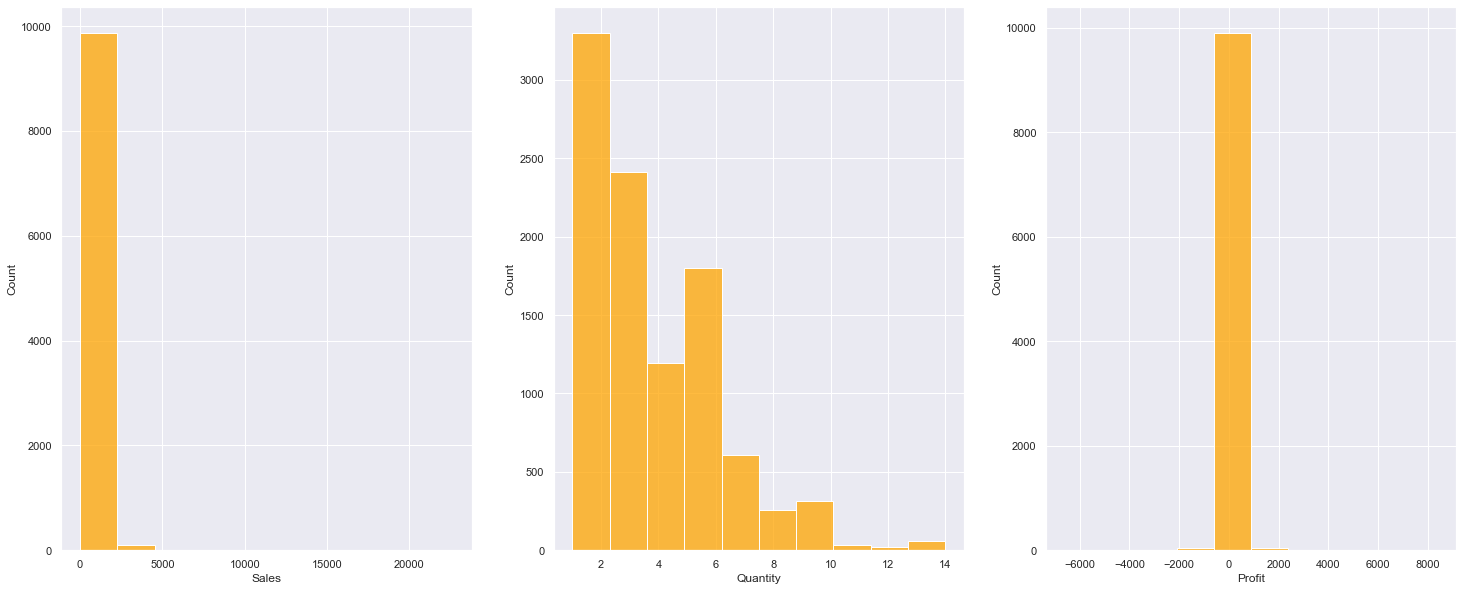

In [14]:
# visualizando a distribuição

plt.figure(figsize=(25,10))

for k in range(len(colunas)):
    
    plt.subplot(1,3, k+1)
    sns.histplot(x=colunas[k],
               data=df,bins=10, color='orange')
    
plt.show()

# 5.0 Modelagem de Dados

# 5.1 Criando variáveis temporais

In [15]:
vendas             = df.loc[:,['OrderID','CustomerID','OrderDate', 'Sales', 'Quantity', 'Discount', 'Profit','Category','SubCategory','City','State', 'SalesPersonName', 'SalesPersonLastName']]
vendas['Month']    = vendas['OrderDate'].dt.month
vendas['Year']     = vendas['OrderDate'].dt.year
vendas['Semester'] = vendas['OrderDate'].dt.year.astype(str) + ' S'+ np.where(vendas['OrderDate'].dt.quarter.gt(2),2,1).astype(str)

## 5.1 Receita e Volume

In [16]:
vendas.head()

,OrderID,CustomerID,OrderDate,Sales,Quantity,Discount,Profit,Category,SubCategory,City,State,SalesPersonName,SalesPersonLastName,Month,Year,Semester
0,CA-2017-167976,JL-15505,2017-11-11,25.50,3,0.0,6.63,Office Supplies,Supplies,Aberdeen,South Dakota,Anna,Andreadi,11,2017,2017 S2
1,CA-2017-165099,DK-13375,2017-12-11,1.39,2,0.8,-3.76,Office Supplies,Appliances,Abilene,Texas,Cassandra,Brandow,12,2017,2017 S2
2,CA-2017-105074,MB-17305,2017-06-24,21.74,3,0.2,6.80,Office Supplies,Paper,Akron,Ohio,Anna,Andreadi,6,2017,2017 S1
3,CA-2014-164224,TT-21070,2014-05-18,149.23,3,0.2,3.73,Furniture,Furnishings,Akron,Ohio,Kelly,Williams,5,2014,2014 S1
4,CA-2014-164224,TT-21070,2014-05-18,15.94,4,0.2,5.78,Office Supplies,Paper,Akron,Ohio,Kelly,Williams,5,2014,2014 S1


In [17]:
# agrupando os valores

receita_volume = vendas.groupby('Year').agg(
    receita=('Sales', 'sum'),
    volume=('Quantity','sum'),
    pedidos=('OrderID','nunique'),
    descontos=('Discount','mean'),
    lucro=('Profit','sum')
).reset_index()

receita_volume_semester = vendas.groupby('Semester').agg(
    receita=('Sales', 'sum'),
    volume=('Quantity','sum'),
    pedidos=('OrderID','nunique'),
    descontos=('Discount','mean'),
    lucro=('Profit','sum')
).reset_index()

In [18]:
receita_volume


,Year,receita,volume,pedidos,descontos,lucro
0,2014,484247.56,7581,969,0.158284,49544.02
1,2015,470532.46,7979,1038,0.155609,61618.68
2,2016,609205.86,9837,1315,0.154743,81795.25
3,2017,733215.19,12476,1687,0.156467,93439.73


In [19]:
receita_volume_semester

,Semester,receita,volume,pedidos,descontos,lucro
0,2014 S1,160986.63,2551,332,0.150475,15015.35
1,2014 S2,323260.93,5030,637,0.162274,34528.67
2,2015 S1,157976.02,2594,358,0.162159,21455.86
3,2015 S2,312556.44,5385,680,0.152310,40162.82
4,2016 S1,229319.53,3483,473,0.157718,27831.68
5,2016 S2,379886.33,6354,842,0.153076,53963.57
6,2017 S1,256909.17,4396,607,0.163101,39005.61
7,2017 S2,476306.02,8080,1080,0.152747,54434.12


<AxesSubplot:title={'center':'VOLUME AO LONGO DO TEMPO'}, xlabel='Year', ylabel='volume'>

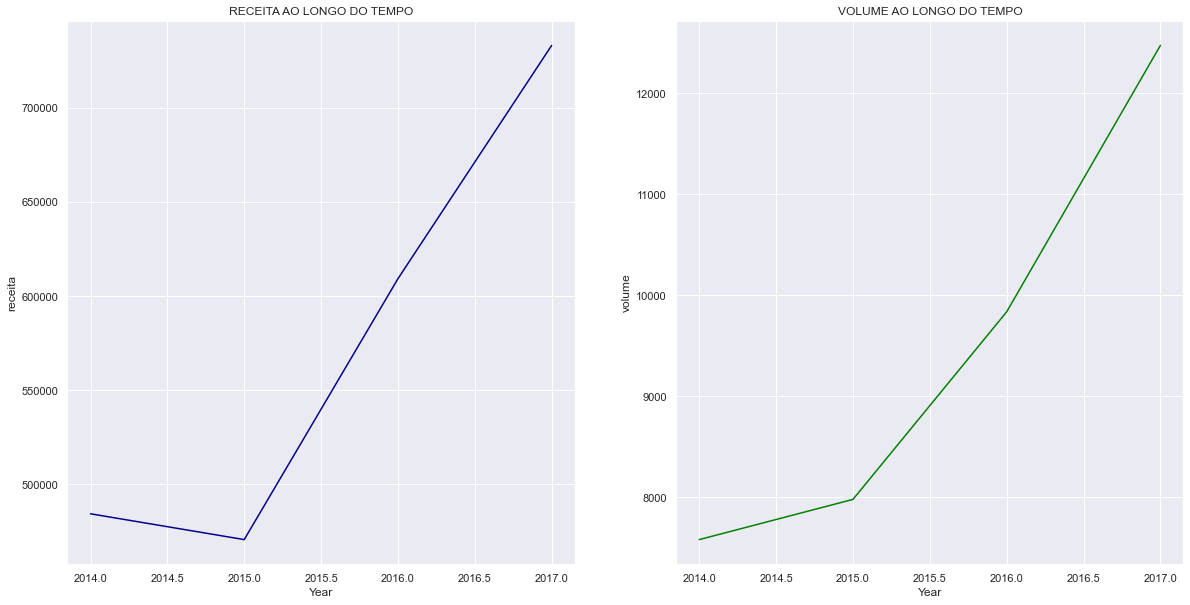

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='receita', data=receita_volume, color='darkblue')
plt.title('RECEITA AO LONGO DO TEMPO')
plt.subplot(1,2,2)
plt.title('VOLUME AO LONGO DO TEMPO')
sns.lineplot(x='Year', y='volume', data=receita_volume, color='green')

<AxesSubplot:title={'center':'VOLUME AO LONGO DO TEMPO'}, xlabel='Semester', ylabel='volume'>

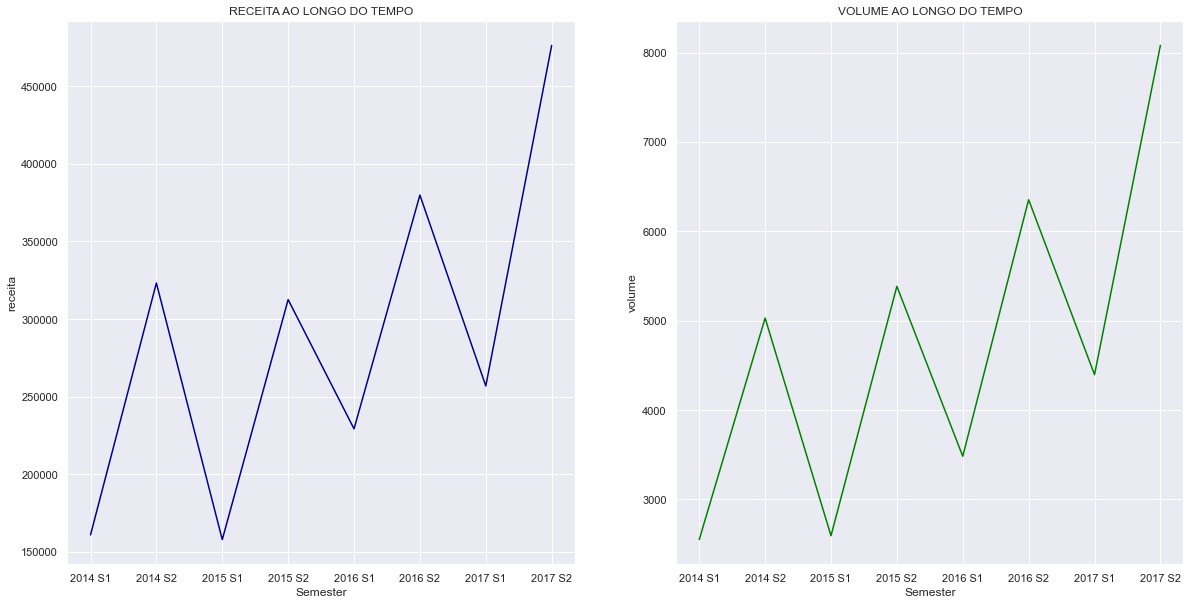

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(x='Semester', y='receita', data=receita_volume_semester, color='darkblue')
plt.title('RECEITA AO LONGO DO TEMPO')
plt.subplot(1,2,2)
plt.title('VOLUME AO LONGO DO TEMPO')
sns.lineplot(x='Semester', y='volume', data=receita_volume_semester, color='green')

In [22]:
receita_volume.to_excel('Resultados/Receita e Volume/receita_volume.xlsx', index=False)
receita_volume_semester.to_excel('Resultados/Receita e Volume/receita_volume_semester.xlsx', index=False)

## 5.2 Localização

In [23]:
vendas_por_estado = vendas[['Semester','State','Sales']].groupby(['Semester', 'State']).sum().reset_index()

vendas_por_estado.to_excel('Resultados/Receita e Volume/vendas_por_estado.xlsx', index=False)

vendas_por_estado.sort_values(['Semester','Sales'], ascending=False).head()

,Semester,State,Sales
297,2017 S2,California,95000.33
322,2017 S2,New York,73412.40
337,2017 S2,Washington,37467.55
328,2017 S2,Pennsylvania,32034.49
333,2017 S2,Texas,23472.94


In [24]:
vendas_por_cidade = vendas[['Semester','City','Sales']].groupby(['Semester', 'City']).sum().reset_index()

vendas_por_cidade.to_excel('Resultados/Receita e Volume/vendas_por_cidade.xlsx', index=False)

vendas_por_cidade.sort_values(['Semester','Sales'], ascending=False).head()

,Semester,City,Sales
1517,2017 S2,New York City,69367.32
1543,2017 S2,Philadelphia,31151.46
1584,2017 S2,Seattle,30414.92
1482,2017 S2,Los Angeles,27608.11
1577,2017 S2,San Francisco,22224.60


## 5.2 Ticket Médio e Cesta

In [25]:
ticket_cesta_ano = vendas[['OrderID','Year','Sales','Quantity']].groupby(['OrderID','Year']).sum().reset_index()

ticket_cesta_ano = ticket_cesta_ano[['Year','Sales','Quantity']].groupby('Year').mean().reset_index()

ticket_cesta_ano.to_excel('Resultados/Perfil de Compra/ticket_cesta_ano.xlsx', index=False)

ticket_cesta_ano.head()

,Year,Sales,Quantity
0,2014,499.739484,7.823529
1,2015,453.306802,7.686898
2,2016,463.274418,7.480608
3,2017,434.626669,7.395376


In [26]:
ticket_cesta_semester = vendas[['OrderID','Semester','Sales','Quantity']].groupby(['OrderID','Semester']).sum().reset_index()

ticket_cesta_semester = ticket_cesta_semester[['Semester','Sales','Quantity']].groupby('Semester').mean().reset_index()

ticket_cesta_semester.columns = ['semestre', 'ticket_medio', 'qtd_media_cesta']

ticket_cesta_semester.to_excel('Resultados/Perfil de Compra/ticket_cesta_semester.xlsx', index=False)

ticket_cesta_semester.head()





,semestre,ticket_medio,qtd_media_cesta
0,2014 S1,484.899488,7.683735
1,2014 S2,507.473987,7.896389
2,2015 S1,441.273799,7.245810
3,2015 S2,459.641824,7.919118
4,2016 S1,484.819302,7.363636


## 5.4 Produtos

In [27]:
vendas.head()

,OrderID,CustomerID,OrderDate,Sales,Quantity,Discount,Profit,Category,SubCategory,City,State,SalesPersonName,SalesPersonLastName,Month,Year,Semester
0,CA-2017-167976,JL-15505,2017-11-11,25.50,3,0.0,6.63,Office Supplies,Supplies,Aberdeen,South Dakota,Anna,Andreadi,11,2017,2017 S2
1,CA-2017-165099,DK-13375,2017-12-11,1.39,2,0.8,-3.76,Office Supplies,Appliances,Abilene,Texas,Cassandra,Brandow,12,2017,2017 S2
2,CA-2017-105074,MB-17305,2017-06-24,21.74,3,0.2,6.80,Office Supplies,Paper,Akron,Ohio,Anna,Andreadi,6,2017,2017 S1
3,CA-2014-164224,TT-21070,2014-05-18,149.23,3,0.2,3.73,Furniture,Furnishings,Akron,Ohio,Kelly,Williams,5,2014,2014 S1
4,CA-2014-164224,TT-21070,2014-05-18,15.94,4,0.2,5.78,Office Supplies,Paper,Akron,Ohio,Kelly,Williams,5,2014,2014 S1


In [28]:
categorias_ano = vendas[['Year','Category','Sales']].groupby(['Category','Year']).sum().reset_index()

categorias_ano.to_excel('Resultados/Analise de Produto/categorias_ano.xlsx', index=False)

categorias_ano.head()

,Category,Year,Sales
0,Furniture,2014,157192.89
1,Furniture,2015,170518.26
2,Furniture,2016,198901.55
3,Furniture,2017,215387.28
4,Office Supplies,2014,151776.41


In [29]:
categorias_semestre = vendas[['Semester','Category','Sales']].groupby(['Category','Semester']).sum().reset_index()

categorias_semestre.to_excel('Resultados/Analise de Produto/categorias_semestre.xlsx', index=False)

categorias_semestre.head()

,Category,Semester,Sales
0,Furniture,2014 S1,50719.92
1,Furniture,2014 S2,106472.97
2,Furniture,2015 S1,54938.95
3,Furniture,2015 S2,115579.31
4,Furniture,2016 S1,65751.93


In [30]:
sub_categorias_semestre = vendas[['Semester','SubCategory','Sales']].groupby(['SubCategory','Semester']).sum().reset_index()



sub_categorias_semestre.to_excel('Resultados/Analise de Produto/sub_categorias_semestre.xlsx', index=False)

## 5.5 Vendedores

In [31]:
vendedores = vendas.copy()
vendedores['SalesPersonNameLastName'] = vendedores['SalesPersonName'] + ' ' + vendedores['SalesPersonLastName']

In [32]:
vendedores = vendedores[['Semester','SalesPersonNameLastName','Sales']].groupby(['SalesPersonNameLastName','Semester']).sum().reset_index()

vendedores.to_excel('Resultados/Vendedores/vendedores_semestre.xlsx', index=False)
vendedores.head()

,SalesPersonNameLastName,Semester,Sales
0,Anna Andreadi,2014 S1,20480.81
1,Anna Andreadi,2014 S2,54578.40
2,Anna Andreadi,2015 S1,25616.05
3,Anna Andreadi,2015 S2,35516.87
4,Anna Andreadi,2016 S1,24980.96


## 5.6 Clientes

In [33]:
clientes = vendas.copy()

In [34]:
clientes = clientes.groupby('CustomerID').agg(
                            UltimaCompra = ('OrderDate','max'),
                            QtdCompras = ('OrderID','nunique')
                            ).reset_index()


clientes.head()

,CustomerID,UltimaCompra,QtdCompras
0,AA-10315,2017-06-29,5
1,AA-10375,2017-12-11,9
2,AA-10480,2017-04-15,4
3,AA-10645,2017-11-05,6
4,AB-10015,2016-11-10,3


In [35]:
# definindo qual a última data do dataset

max_date = clientes['UltimaCompra'].max()

clientes['DiasDesdeUltimaCompra'] = (max_date - clientes['UltimaCompra']).dt.days

In [36]:
clientes.head()

,CustomerID,UltimaCompra,QtdCompras,DiasDesdeUltimaCompra
0,AA-10315,2017-06-29,5,184
1,AA-10375,2017-12-11,9,19
2,AA-10480,2017-04-15,4,259
3,AA-10645,2017-11-05,6,55
4,AB-10015,2016-11-10,3,415


In [37]:
clientes.isna().sum()

CustomerID               0
UltimaCompra             0
QtdCompras               0
DiasDesdeUltimaCompra    0
dtype: int64

In [38]:
# atribuindo um status para cada cliente com base na sua recência

for i in range(len(clientes)):
    if (clientes.loc[i, 'DiasDesdeUltimaCompra'] > 180):
        clientes.loc[i, 'Status'] = 'Inativo'
        
    elif (clientes.loc[i, 'DiasDesdeUltimaCompra'] <= 180):
        clientes.loc[i, 'Status'] = 'Ativo'
        

In [39]:
clientes.head()

,CustomerID,UltimaCompra,QtdCompras,DiasDesdeUltimaCompra,Status
0,AA-10315,2017-06-29,5,184,Inativo
1,AA-10375,2017-12-11,9,19,Ativo
2,AA-10480,2017-04-15,4,259,Inativo
3,AA-10645,2017-11-05,6,55,Ativo
4,AB-10015,2016-11-10,3,415,Inativo


In [40]:
clientes['Status'].value_counts()

Ativo      594
Inativo    199
Name: Status, dtype: int64

### 5.6.1 Churn

In [41]:
vendas.head()

,OrderID,CustomerID,OrderDate,Sales,Quantity,Discount,Profit,Category,SubCategory,City,State,SalesPersonName,SalesPersonLastName,Month,Year,Semester
0,CA-2017-167976,JL-15505,2017-11-11,25.50,3,0.0,6.63,Office Supplies,Supplies,Aberdeen,South Dakota,Anna,Andreadi,11,2017,2017 S2
1,CA-2017-165099,DK-13375,2017-12-11,1.39,2,0.8,-3.76,Office Supplies,Appliances,Abilene,Texas,Cassandra,Brandow,12,2017,2017 S2
2,CA-2017-105074,MB-17305,2017-06-24,21.74,3,0.2,6.80,Office Supplies,Paper,Akron,Ohio,Anna,Andreadi,6,2017,2017 S1
3,CA-2014-164224,TT-21070,2014-05-18,149.23,3,0.2,3.73,Furniture,Furnishings,Akron,Ohio,Kelly,Williams,5,2014,2014 S1
4,CA-2014-164224,TT-21070,2014-05-18,15.94,4,0.2,5.78,Office Supplies,Paper,Akron,Ohio,Kelly,Williams,5,2014,2014 S1


Criando uma tabela com os usuários únicos

In [42]:
user = vendas.groupby(['CustomerID'])['OrderDate'].min().reset_index()

user.head()

,CustomerID,OrderDate
0,AA-10315,2014-03-31
1,AA-10375,2014-04-21
2,AA-10480,2014-05-04
3,AA-10645,2014-06-22
4,AB-10015,2014-02-18


In [43]:
user.columns = ['CustomerID','reg_date']


# criando coluna de primeiro dia de cada mês
user['reg_month'] = user['reg_date'].values.astype('datetime64[M]')

In [44]:
user.head()

,CustomerID,reg_date,reg_month
0,AA-10315,2014-03-31,2014-03-01
1,AA-10375,2014-04-21,2014-04-01
2,AA-10480,2014-05-04,2014-05-01
3,AA-10645,2014-06-22,2014-06-01
4,AB-10015,2014-02-18,2014-02-01


Gerando tabela com todos os possíveis meses para cada cliente

In [45]:
min_month = vendas['OrderDate'].values.astype('datetime64[M]').min()

max_month = vendas['OrderDate'].values.astype('datetime64[M]').max()

pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [46]:
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']

In [47]:
# criando chave para unir a tabela 'dr' e a 'user'

dr['key'] = 1
user['key'] = 1

report = dr.merge(user,on='key')

In [48]:
report.head()

,month,key,CustomerID,reg_date,reg_month
0,2014-01-01,1,AA-10315,2014-03-31,2014-03-01
1,2014-01-01,1,AA-10375,2014-04-21,2014-04-01
2,2014-01-01,1,AA-10480,2014-05-04,2014-05-01
3,2014-01-01,1,AA-10645,2014-06-22,2014-06-01
4,2014-01-01,1,AB-10015,2014-02-18,2014-02-01


In [49]:
# removendo as datas que antecedem a chegada do cliente

report = report[report['month']>=report['reg_month']]

In [50]:
# visualizando um exemplo

report[report['CustomerID'] == 'AB-10105']

,month,key,CustomerID,reg_date,reg_month
8729,2014-12-01,1,AB-10105,2014-12-20,2014-12-01
9522,2015-01-01,1,AB-10105,2014-12-20,2014-12-01
10315,2015-02-01,1,AB-10105,2014-12-20,2014-12-01
11108,2015-03-01,1,AB-10105,2014-12-20,2014-12-01
11901,2015-04-01,1,AB-10105,2014-12-20,2014-12-01
12694,2015-05-01,1,AB-10105,2014-12-20,2014-12-01
13487,2015-06-01,1,AB-10105,2014-12-20,2014-12-01
14280,2015-07-01,1,AB-10105,2014-12-20,2014-12-01
15073,2015-08-01,1,AB-10105,2014-12-20,2014-12-01
15866,2015-09-01,1,AB-10105,2014-12-20,2014-12-01


Criando uma tabela aggregate

In [51]:
# criando a variável de primeiro dia do mês de cada pedido

vendas['month'] = vendas['OrderDate'].values.astype('datetime64[M]')

In [52]:
vendas.head()

,OrderID,CustomerID,OrderDate,Sales,Quantity,Discount,Profit,Category,SubCategory,City,State,SalesPersonName,SalesPersonLastName,Month,Year,Semester,month
0,CA-2017-167976,JL-15505,2017-11-11,25.50,3,0.0,6.63,Office Supplies,Supplies,Aberdeen,South Dakota,Anna,Andreadi,11,2017,2017 S2,2017-11-01
1,CA-2017-165099,DK-13375,2017-12-11,1.39,2,0.8,-3.76,Office Supplies,Appliances,Abilene,Texas,Cassandra,Brandow,12,2017,2017 S2,2017-12-01
2,CA-2017-105074,MB-17305,2017-06-24,21.74,3,0.2,6.80,Office Supplies,Paper,Akron,Ohio,Anna,Andreadi,6,2017,2017 S1,2017-06-01
3,CA-2014-164224,TT-21070,2014-05-18,149.23,3,0.2,3.73,Furniture,Furnishings,Akron,Ohio,Kelly,Williams,5,2014,2014 S1,2014-05-01
4,CA-2014-164224,TT-21070,2014-05-18,15.94,4,0.2,5.78,Office Supplies,Paper,Akron,Ohio,Kelly,Williams,5,2014,2014 S1,2014-05-01


In [53]:
# agrupando a quantidade de receita vinda de cada cliente, por mês

sales_month = vendas.groupby(['CustomerID','month'])[['Sales']].agg('sum').reset_index()

In [54]:
sales_month.head()

,CustomerID,month,Sales
0,AA-10315,2014-03-01,726.55
1,AA-10315,2014-09-01,29.50
2,AA-10315,2015-10-01,26.96
3,AA-10315,2016-03-01,4406.07
4,AA-10315,2017-06-01,374.48


In [55]:
# checando se não houve duplicação de observações

vendas['Sales'].sum(), sales_month['Sales'].sum()

(2297201.07, 2297201.07)

In [56]:
# unindo ao report

report = report.merge(sales_month,how='left',on=['CustomerID','month'])

In [57]:
report.head()

,month,key,CustomerID,reg_date,reg_month,Sales
0,2014-01-01,1,AJ-10780,2014-01-10,2014-01-01,54.83
1,2014-01-01,1,BD-11605,2014-01-13,2014-01-01,1679.75
2,2014-01-01,1,BS-11590,2014-01-14,2014-01-01,61.96
3,2014-01-01,1,CA-11965,2014-01-26,2014-01-01,152.64
4,2014-01-01,1,CS-12250,2014-01-13,2014-01-01,1287.26


In [58]:
# checando se não houve duplicação de observações

vendas['Sales'].sum(), report['Sales'].sum()

(2297201.07, 2297201.07)

In [59]:
# visualizando o exemplo de cliente

report[report['CustomerID'] == 'AB-10105']

,month,key,CustomerID,reg_date,reg_month,Sales
3076,2014-12-01,1,AB-10105,2014-12-20,2014-12-01,1107.66
3671,2015-01-01,1,AB-10105,2014-12-20,2014-12-01,NaN
4273,2015-02-01,1,AB-10105,2014-12-20,2014-12-01,NaN
4882,2015-03-01,1,AB-10105,2014-12-20,2014-12-01,NaN
5509,2015-04-01,1,AB-10105,2014-12-20,2014-12-01,NaN
6148,2015-05-01,1,AB-10105,2014-12-20,2014-12-01,NaN
6799,2015-06-01,1,AB-10105,2014-12-20,2014-12-01,NaN
7462,2015-07-01,1,AB-10105,2014-12-20,2014-12-01,NaN
8133,2015-08-01,1,AB-10105,2014-12-20,2014-12-01,NaN
8817,2015-09-01,1,AB-10105,2014-12-20,2014-12-01,NaN


Métricas

In [60]:
report['user'] = 1
report['new'] = (report['reg_month'] == report['month']) * 1
report['active'] = (report['Sales'] > 0) * 1

In [61]:
report.head()

,month,key,CustomerID,reg_date,reg_month,Sales,user,new,active
0,2014-01-01,1,AJ-10780,2014-01-10,2014-01-01,54.83,1,1,1
1,2014-01-01,1,BD-11605,2014-01-13,2014-01-01,1679.75,1,1,1
2,2014-01-01,1,BS-11590,2014-01-14,2014-01-01,61.96,1,1,1
3,2014-01-01,1,CA-11965,2014-01-26,2014-01-01,152.64,1,1,1
4,2014-01-01,1,CS-12250,2014-01-13,2014-01-01,1287.26,1,1,1


In [62]:
report.groupby('month')[['Sales','user','new','active']].agg('sum').reset_index()

,month,Sales,user,new,active
0,2014-01-01,14236.90,32,32,32
1,2014-02-01,4519.92,56,24,27
2,2014-03-01,55691.04,121,65,69
3,2014-04-01,28295.35,177,56,64
4,2014-05-01,23648.28,233,56,67
5,2014-06-01,34595.14,281,48,63
6,2014-07-01,33946.37,325,44,65
7,2014-08-01,27909.47,374,49,70
8,2014-09-01,81777.34,442,68,118
9,2014-10-01,31453.37,484,42,75


In [63]:
t = report.groupby('month')[['Sales','user','new','active']].agg('sum').reset_index()

t['avg_revenue'] = t['Sales'] / t['active']

t

,month,Sales,user,new,active,avg_revenue
0,2014-01-01,14236.90,32,32,32,444.903125
1,2014-02-01,4519.92,56,24,27,167.404444
2,2014-03-01,55691.04,121,65,69,807.116522
3,2014-04-01,28295.35,177,56,64,442.114844
4,2014-05-01,23648.28,233,56,67,352.959403
5,2014-06-01,34595.14,281,48,63,549.129206
6,2014-07-01,33946.37,325,44,65,522.251846
7,2014-08-01,27909.47,374,49,70,398.706714
8,2014-09-01,81777.34,442,68,118,693.028305
9,2014-10-01,31453.37,484,42,75,419.378267


O Churn de fato

In [64]:
report.drop('key',axis=1,inplace=True)

In [65]:
report[report['CustomerID'] == 'AB-10105']

,month,CustomerID,reg_date,reg_month,Sales,user,new,active
3076,2014-12-01,AB-10105,2014-12-20,2014-12-01,1107.66,1,1,1
3671,2015-01-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
4273,2015-02-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
4882,2015-03-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
5509,2015-04-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
6148,2015-05-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
6799,2015-06-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
7462,2015-07-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
8133,2015-08-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0
8817,2015-09-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0


In [66]:
# criando indicador de atividade no mês anterior
report['active_prev'] = (report.sort_values(by=['month'], ascending=True)
                       .groupby(['CustomerID'])['active'].shift(1))

# criando flag de mudança de status
report['change_status'] = (report['active'] != report['active_prev']) * 1

# criando variável de soma de mudança de status
report['session_id'] = (report.sort_values(by=['month'], ascending=True)
                       .groupby(['CustomerID'])['change_status'].cumsum())

In [67]:
report[report['CustomerID'] == 'AB-10105']

,month,CustomerID,reg_date,reg_month,Sales,user,new,active,active_prev,change_status,session_id
3076,2014-12-01,AB-10105,2014-12-20,2014-12-01,1107.66,1,1,1,NaN,1,1
3671,2015-01-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,1.0,1,2
4273,2015-02-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
4882,2015-03-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
5509,2015-04-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
6148,2015-05-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
6799,2015-06-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
7462,2015-07-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
8133,2015-08-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2
8817,2015-09-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2


In [68]:
# criando variável de inatividade
report['inactive'] = (report['active'] == 0) * 1


# criando variável de sequência de meses inativos
report['month_inactive'] = (report.sort_values(by=['month'], ascending=True)
                       .groupby(['CustomerID','session_id'])['inactive'].cumsum())

In [69]:
report[report['CustomerID'] == 'AB-10105']

,month,CustomerID,reg_date,reg_month,Sales,user,new,active,active_prev,change_status,session_id,inactive,month_inactive
3076,2014-12-01,AB-10105,2014-12-20,2014-12-01,1107.66,1,1,1,NaN,1,1,0,0
3671,2015-01-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,1.0,1,2,1,1
4273,2015-02-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,2
4882,2015-03-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,3
5509,2015-04-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,4
6148,2015-05-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,5
6799,2015-06-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,6
7462,2015-07-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,7
8133,2015-08-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,8
8817,2015-09-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,9


In [70]:
# criando variável que mostra se o cliente deu churn (atingiu 6 meses inativo)
report['churn_6m'] = (report['month_inactive'] >= 6) * 1

In [71]:
report[report['CustomerID'] == 'AB-10105']

,month,CustomerID,reg_date,reg_month,Sales,user,new,active,active_prev,change_status,session_id,inactive,month_inactive,churn_6m
3076,2014-12-01,AB-10105,2014-12-20,2014-12-01,1107.66,1,1,1,NaN,1,1,0,0,0
3671,2015-01-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,1.0,1,2,1,1,0
4273,2015-02-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,2,0
4882,2015-03-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,3,0
5509,2015-04-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,4,0
6148,2015-05-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,5,0
6799,2015-06-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,6,1
7462,2015-07-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,7,1
8133,2015-08-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,8,1
8817,2015-09-01,AB-10105,2014-12-20,2014-12-01,NaN,1,0,0,0.0,0,2,1,9,1


In [72]:
# consolidando resultados
t = report.groupby('month')[['Sales','user','new','active','churn_6m']].agg('sum').reset_index()

# definindo o índice de churn
t['churn_6m%'] = t['churn_6m'] / t['user']

In [73]:
t.to_excel('Resultados/Analise de Cliente/acompanhamento_clientes.xlsx', index=False)

t

,month,Sales,user,new,active,churn_6m,churn_6m%
0,2014-01-01,14236.90,32,32,32,0,0.000000
1,2014-02-01,4519.92,56,24,27,0,0.000000
2,2014-03-01,55691.04,121,65,69,0,0.000000
3,2014-04-01,28295.35,177,56,64,0,0.000000
4,2014-05-01,23648.28,233,56,67,0,0.000000
5,2014-06-01,34595.14,281,48,63,0,0.000000
6,2014-07-01,33946.37,325,44,65,23,0.070769
7,2014-08-01,27909.47,374,49,70,38,0.101604
8,2014-09-01,81777.34,442,68,118,80,0.180995
9,2014-10-01,31453.37,484,42,75,107,0.221074


# 6.0 Segmentação RFM/RFV

In [74]:
# criando data referência para o cálculo de recência
snapshot_date = vendas['OrderDate'].max() + timedelta(days=1)
print(snapshot_date)

2017-12-31 00:00:00


In [75]:
# consolidando os dados de recência, frequência e valor monetário
data_process = vendas.groupby(['CustomerID']).agg({
        'OrderDate': lambda x: (snapshot_date - x.max()).days,
        'OrderID': 'nunique',
        'Sales': 'sum'}).reset_index()

data_process.rename(columns={'OrderDate': 'Recency',
                         'OrderID': 'Frequency',
                         'Sales': 'MonetaryValue'}, inplace=True)

In [76]:
data_process

,CustomerID,Recency,Frequency,MonetaryValue
0,AA-10315,185,5,5563.56
1,AA-10375,20,9,1056.39
2,AA-10480,260,4,1790.51
3,AA-10645,56,6,5086.94
4,AB-10015,416,3,886.15
5,AB-10060,55,8,7755.63
6,AB-10105,42,10,14473.57
7,AB-10150,42,5,966.71
8,AB-10165,26,8,1113.85
9,AB-10255,167,9,914.53


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

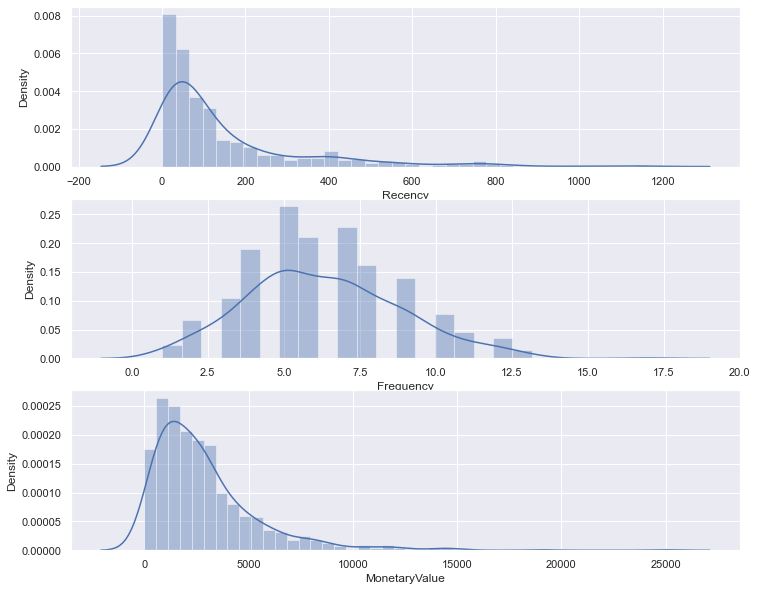

In [77]:
# plotanto a distribuição do RFM
plt.figure(figsize=(12,10))
# R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])

plt.show()

In [78]:
# calculando as notas para as variáveis RFM

# criando as notas para recência e frequência
r_labels = range(4, 0, -1) # quanto menor, melhor

f_labels = range(1, 5) # quanto maior, melhor


# atribuindo as notas de acordo com os percentis 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)

# criando as novas colunas
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)

data_process.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F
0,AA-10315,185,5,5563.56,1,1
1,AA-10375,20,9,1056.39,4,4
2,AA-10480,260,4,1790.51,1,1
3,AA-10645,56,6,5086.94,3,2
4,AB-10015,416,3,886.15,1,1


In [79]:
# criandoa as notas para M
m_labels = range(1, 5) # quanto maior, melhor

# atribuindo as notas de acordo com os percentis  
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

# criando coluna M
data_process = data_process.assign(M = m_groups.values)

In [80]:
data_process.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,AA-10315,185,5,5563.56,1,1,4
1,AA-10375,20,9,1056.39,4,4,1
2,AA-10480,260,4,1790.51,1,1,2
3,AA-10645,56,6,5086.94,3,2,4
4,AB-10015,416,3,886.15,1,1,1


In [81]:
# concatenando as colunas RFM
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
0,AA-10315,185,5,5563.56,1,1,4,114
1,AA-10375,20,9,1056.39,4,4,1,441
2,AA-10480,260,4,1790.51,1,1,2,112
3,AA-10645,56,6,5086.94,3,2,4,324
4,AB-10015,416,3,886.15,1,1,1,111


In [82]:
# contagem das diferentes combinações obtidas
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

62


In [83]:
# somando as colunas RFM

rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

# nomeando os clientes de acordo com o RFM_Score
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'TOP DO TOP'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'TOP'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Leais'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potenciais'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promissores'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Precisam de Atenção'
    else:
        return 'Precisam ser Reativados'

rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,AA-10315,185,5,5563.56,1,1,4,114,6,Potenciais
1,AA-10375,20,9,1056.39,4,4,1,441,9,TOP DO TOP
2,AA-10480,260,4,1790.51,1,1,2,112,4,Precisam de Atenção
3,AA-10645,56,6,5086.94,3,2,4,324,9,TOP DO TOP
4,AB-10015,416,3,886.15,1,1,1,111,3,Precisam ser Reativados


In [84]:
# calculando as métricas dos grupos 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)


print(rfm_level_agg)

                        Recency Frequency MonetaryValue      
                           mean      mean          mean count
RFM_Level                                                    
Leais                     133.0       6.3        2756.2    77
Potenciais                117.8       4.8        2070.0   103
Precisam de Atenção       299.3       3.9        1145.5    72
Precisam ser Reativados   462.0       3.2         548.9    67
Promissores               201.0       4.6        1483.5    93
TOP                        80.7       6.6        3381.6    92
TOP DO TOP                 56.1       8.6        4510.2   289


In [85]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']


In [86]:
# exportando a tabela

rfm_level_agg.reset_index().to_excel('Resultados/Analise de Cliente/resumo_grupos.xlsx')

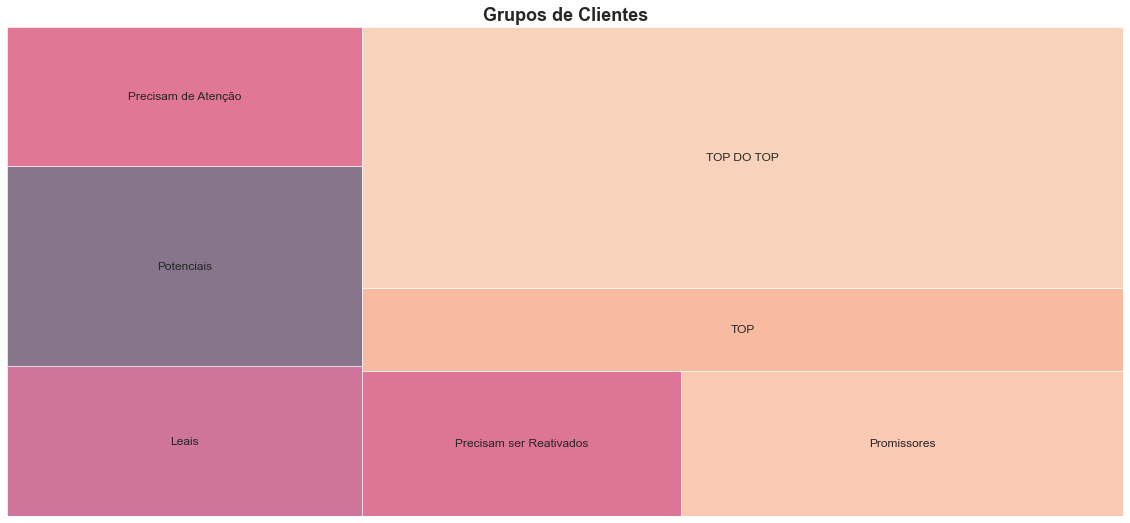

In [88]:
# criando treeplot.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Leais',
                     'Potenciais',
                     'Precisam de Atenção',
                     'Precisam ser Reativados',
                     'Promissores',
                     'TOP', 
                     'TOP DO TOP'], alpha=.6 )
plt.title("Grupos de Clientes",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Obrigado!